In [9]:
import pandas as pd

amex_df = pd.read_csv('./gen/amex_df.csv',
                           parse_dates=True,
                           index_col=0)
amex_df.tail()
 

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2018-12-24,89.50,91.55,89.50,-2.004,90.74,91.33,3190855,20181224,0,392,4.443110,4.863392
2018-12-26,93.84,93.89,89.05,4.849,89.85,89.50,5383666,20181226,2,393,4.479191,4.860273
2018-12-27,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181227,3,394,4.511992,4.857570
2018-12-28,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181228,4,395,4.541811,4.855227
2018-12-31,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181231,0,396,4.568919,4.853197


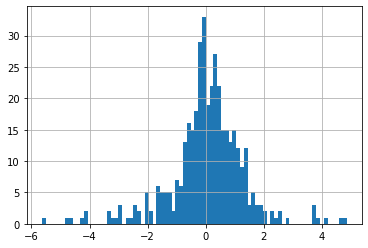

In [4]:

# Different stocks has different variation. Let's use top 10% of variation as 'abnormal' deviation.
# When abnormal deviation happens, trade

amex_df.p_change.hist(bins=80)


In [21]:

# Normal Distribution
# Use qcut to cut percentile
import numpy as np

cuts = pd.qcut(np.abs(amex_df.p_change), 
               10)
cuts.value_counts()

# Result is 1.951%


(-0.001, 0.094]    41
(1.951, 5.63]      40
(1.33, 1.951]      40
(0.749, 0.995]     40
(0.449, 0.59]      40
(0.196, 0.322]     40
(0.995, 1.33]      39
(0.59, 0.749]      39
(0.322, 0.449]     39
(0.094, 0.196]     39
Name: p_change, dtype: int64

In [22]:

bins = [-np.inf,
        -7.0,
        -5,
        -3,
        0,
        3,
        5,
        7,
        np.inf]
fixed_cuts = pd.cut(amex_df.p_change, bins)
fixed_cuts.value_counts()


(0.0, 3.0]      203
(-3.0, 0.0]     177
(-5.0, -3.0]      9
(3.0, 5.0]        7
(-7.0, -5.0]      1
(7.0, inf]        0
(5.0, 7.0]        0
(-inf, -7.0]      0
Name: p_change, dtype: int64

In [26]:

change_ration_dummies = pd.get_dummies(fixed_cuts,
                                       prefix='cr_dummies')
change_ration_dummies.tail()

,"cr_dummies_(-inf, -7.0]","cr_dummies_(-7.0, -5.0]","cr_dummies_(-5.0, -3.0]","cr_dummies_(-3.0, 0.0]","cr_dummies_(0.0, 3.0]","cr_dummies_(3.0, 5.0]","cr_dummies_(5.0, 7.0]","cr_dummies_(7.0, inf]"
2018-12-24,0,0,0,1,0,0,0,0
2018-12-26,0,0,0,0,0,1,0,0
2018-12-27,0,0,0,1,0,0,0,0
2018-12-28,0,0,0,1,0,0,0,0
2018-12-31,0,0,0,1,0,0,0,0
